<h1 style="color:red;"> INDIA UNEMPLOYMENT DATA ANALYSIS</h1>

Installing important imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings


Loading our Dataset

In [3]:
India_df = pd.read_csv('Unemployment.csv')

Getting the shape of the dataset, displaying the first 5 rows and last 5 rows

In [4]:
India_df.shape

(768, 7)

In [5]:
India_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
India_df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting more detail about our dataset

In [68]:
India_df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'year', 'month', 'season'],
      dtype='object')

In [7]:
India_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
India_df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [9]:
India_df.duplicated().sum()

27

In [10]:
India_df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
India_df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


Before we can properly analyze the data, we can work on removing the rows with nulls entries(because the entire row is empty)

In [12]:
India_df = India_df.dropna()
India_df = India_df.reset_index(drop=True)


All the empty rows have been removed

In [13]:
India_df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

Duplicates are cleared 

In [14]:
India_df.duplicated().sum()

0

We work on our analysis for the India Unemployment Data

In [15]:
India_df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
736,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
737,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
738,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


We look at the Distribution of the Areas

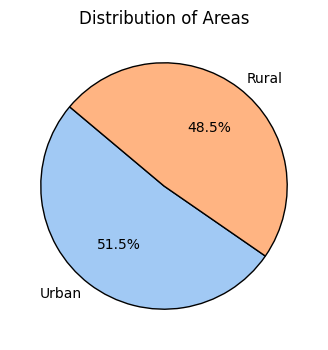

In [16]:
area_counts = India_df['Area'].value_counts()
plt.figure(figsize=(4, 4))
area_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Areas')
plt.ylabel('')  
plt.show()

Most of the regions are on the same level besides 4 regions which are relatively lower.

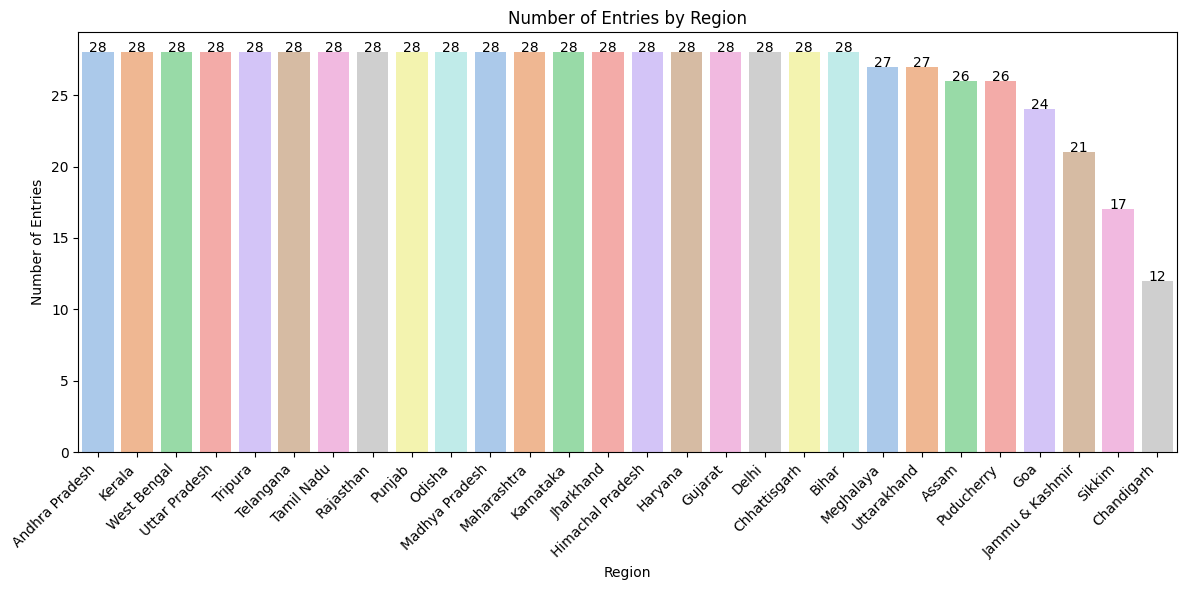

In [17]:
# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Count the frequency of each region
region_counts = India_df['Region'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=region_counts.index, y=region_counts.values, palette='pastel', dodge=False)
plt.title('Number of Entries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Entries')

# Annotate bars with the exact number on top
for p, label in zip(ax.patches, region_counts.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

# Set x-axis ticks and labels
ax.set_xticks(range(len(region_counts.index)))
ax.set_xticklabels(region_counts.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


The Estimated labour participation rate is slightly higher at Rural areas as more rural people seeek employment

In [23]:
avg_labour_participation_rate = India_df.groupby('Area')[' Estimated Labour Participation Rate (%)'].mean()
print(avg_labour_participation_rate)

Area
Rural    44.464819
Urban    40.901365
Name:  Estimated Labour Participation Rate (%), dtype: float64


The estimated unemployment rate varies from one region to another but we can deduce that most regions have a significantly higher rate than the average region

In [34]:
avg_Unemployment_rate = India_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
avg_Unemployment_rate


Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name:  Estimated Unemployment Rate (%), dtype: float64

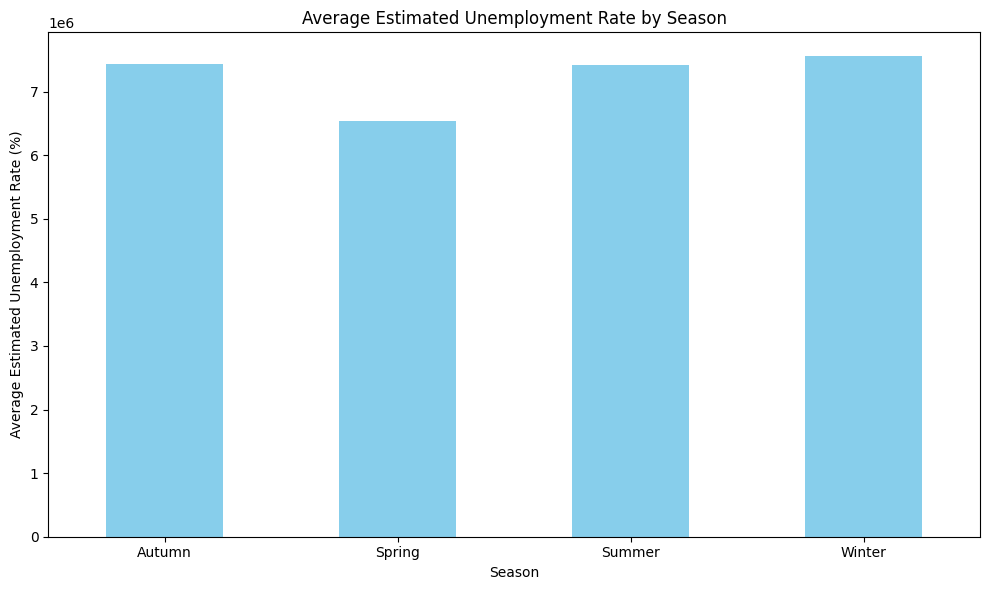

In [62]:
avg_unemployment_by_season = India_df.groupby('season')[' Estimated Employed'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_unemployment_by_season.plot(kind='bar', color='skyblue')
plt.title('Average Estimated Unemployment Rate by Season')
plt.xlabel('Season')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The estimated employed by area in Rurals is twice as big as the Urban areas. Most people employed are from the Rural areas.

In [42]:
est_employed_rate = India_df.groupby('Area')[' Estimated Employed'].sum().sort_values(ascending=False)
est_employed_rate = est_employed_rate.apply(lambda x: '{:,.0f}'.format(x))
est_employed_rate


Area
Rural    3,659,234,073
Urban    1,672,066,346
Name:  Estimated Employed, dtype: object

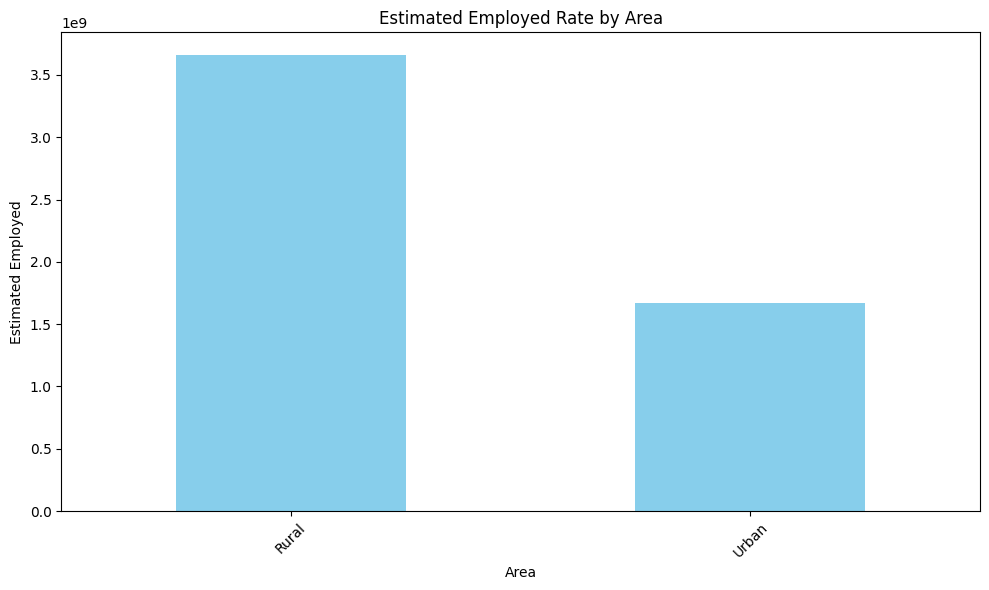

In [45]:
est_employed_rate = India_df.groupby('Area')[' Estimated Employed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
est_employed_rate.plot(kind='bar', color='skyblue')
plt.title('Estimated Employed Rate by Area')
plt.xlabel('Area')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Converting our date using datetime stamp to get months, years and seasons for better analysis

In [57]:
# Convert 'date' column to datetime format
India_df[' Date'] = pd.to_datetime(India_df[' Date'], format=' %d-%m-%Y')

# Map numeric month
India_df['month'] = India_df[' Date'].dt.month_name()

# Extract year and season 
India_df['year'] = India_df[' Date'].dt.year

def get_season(month):
    if month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'

India_df['season'] = India_df['month'].apply(get_season)

India_df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month,season
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,May,Spring
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,June,Summer
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,July,Summer
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,August,Summer
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,September,Autumn
...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020,February,Winter
736,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020,March,Spring
737,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020,April,Spring
738,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020,May,Spring


The estimated unemployment rate is highest in spring and average on most seasons, this could be because most jobs are scarce during the spring season

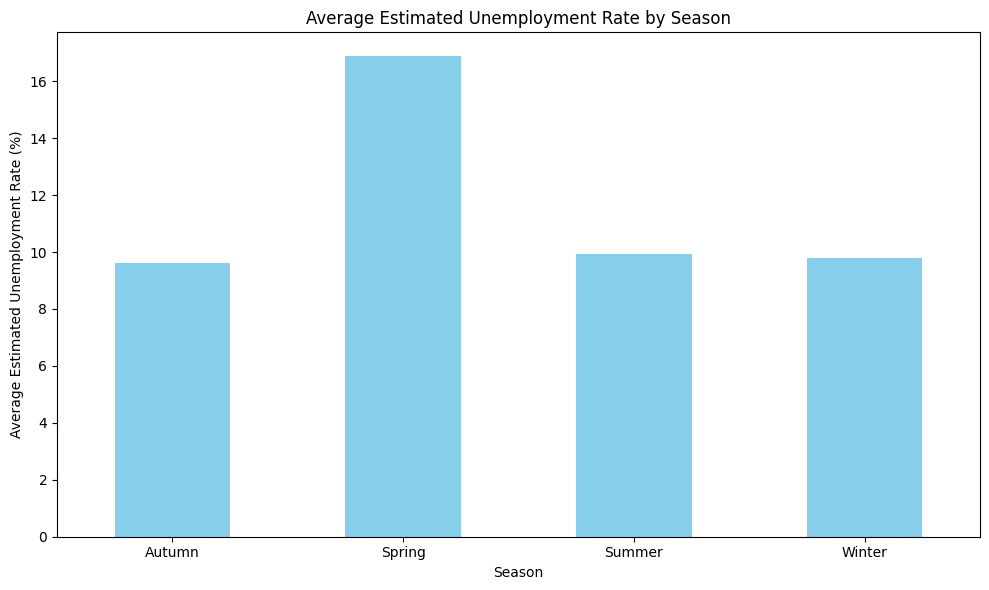

In [59]:
avg_unemployment_by_season = India_df.groupby('season')[' Estimated Unemployment Rate (%)'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_unemployment_by_season.plot(kind='bar', color='skyblue')
plt.title('Average Estimated Unemployment Rate by Season')
plt.xlabel('Season')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

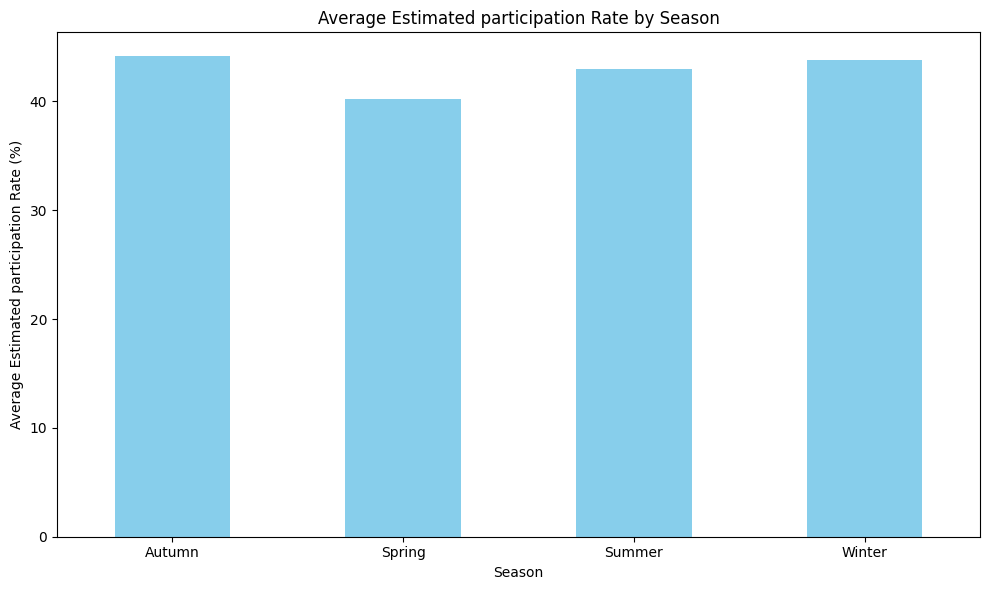

In [60]:
avg_unemployment_by_season = India_df.groupby('season')[' Estimated Labour Participation Rate (%)'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_unemployment_by_season.plot(kind='bar', color='skyblue')
plt.title('Average Estimated participation Rate by Season')
plt.xlabel('Season')
plt.ylabel('Average Estimated participation Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This is an indepth analysis of how the estimated labour participation rate varies from year to year and month to month.

September 2019 being the highest at 44.3%

April 2020 being the lowest at 35.1%

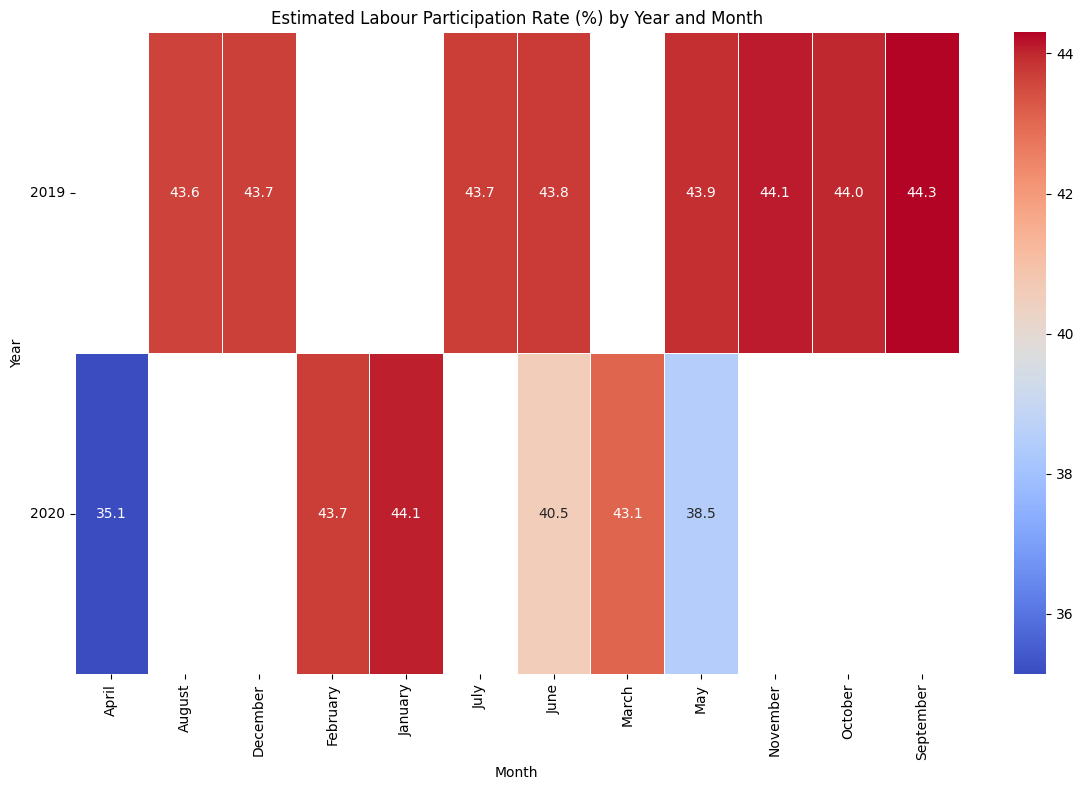

In [63]:
# Create a pivot table
pivot_table = India_df.pivot_table(index='year', columns='month', values=' Estimated Labour Participation Rate (%)')
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Estimated Labour Participation Rate (%) by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

More employed people in the Rural areas over two years compared to the Urban areas

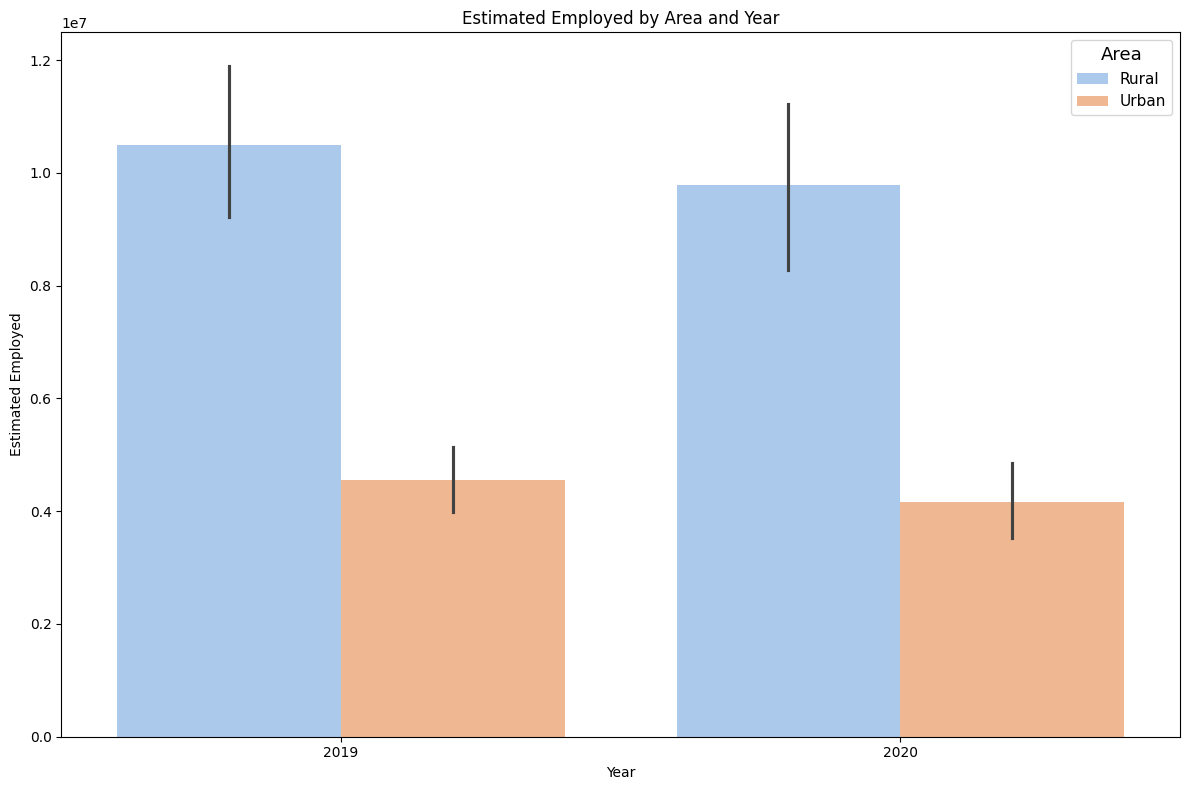

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y=' Estimated Employed', hue='Area', data=India_df, palette='pastel')
plt.title('Estimated Employed by Area and Year')
plt.xlabel('Year')
plt.ylabel('Estimated Employed')
plt.legend(title='Area', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

In conclusion, The unemployment in India is still an ongoing problem that the government needs to intervene with good measures to aleviate their economy and its people.This analysis shows us a factual backing of how indias people are directly affected by unemployement by looking at key factors such as Regions,Areas,Estimated Unemployment Rate (%),Estimated Employed and most importantly Estimated Labour Participation Rate (%).